In [1]:
%config InlineBackend.figure_format = 'retina'

In [9]:
class PRG:

    def __init__(self, seed):
        self.seed = seed

    def _middle_square_implementation(self, seed, prn_length):
        assert len(str(seed))!=prn_length, ValueError
        square = seed**2
        str_square = str(square).zfill(prn_length*2)
        start = int((len(str_square)-prn_length)/2)
        middle = int(str_square[start:prn_length+1])
        return middle, middle
    
    @classmethod
    def middle_square(cls,seed):
        state = seed
        while True:
            state, prn = cls._middle_square_implementation(state, prn_length=len(str(state)))
            yield prn

    @classmethod
    def wichmannhill(cls):
        state, prn = _wichmannhill_implementation(seed)
        yield prn

    def generate(self, generator=middle_square):
        return generator(self.seed)

In [8]:
prn = PRG(44567)
prn_generator = prn.generate()
next(prn_generator)

TypeError: 'classmethod' object is not callable

In [10]:
a = PRG.middle_square(45)
next(a)

TypeError: _middle_square_implementation() missing 1 required positional argument: 'seed'

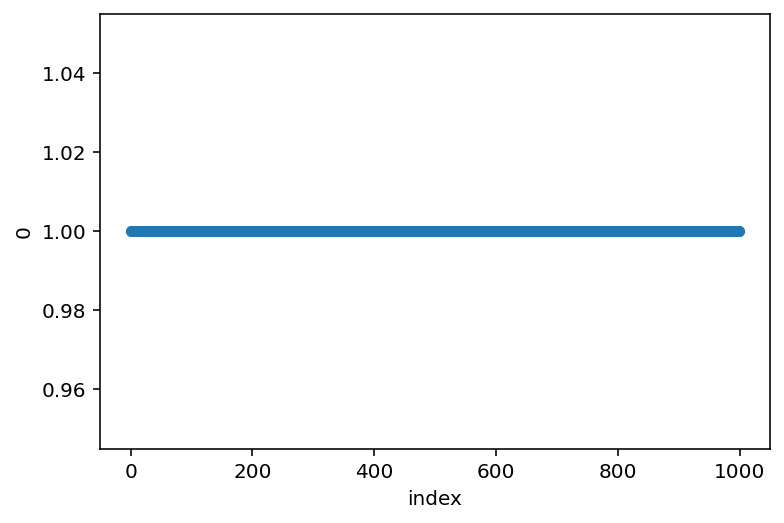

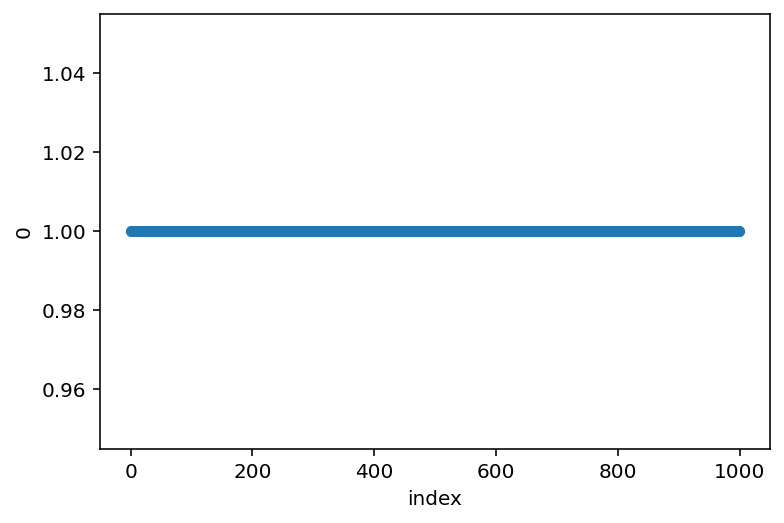

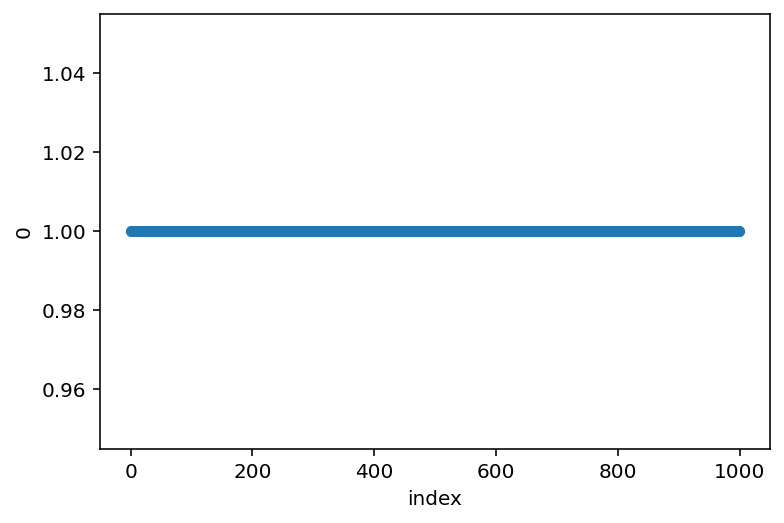

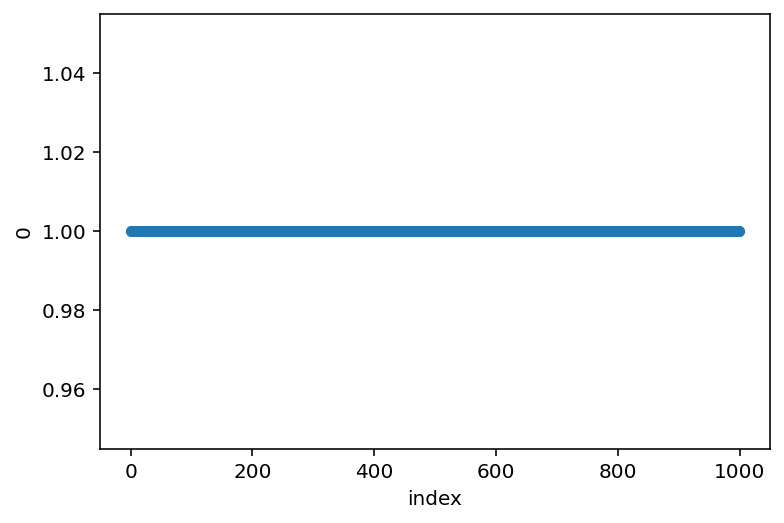

In [727]:
import pandas as pd
import matplotlib as plt

def generate_show_prns(seed, iterations=1000):
    prn = PRG(seed)
    prn_generator = prn.generate()
    middle_square_gen_numbers = pd.DataFrame([next(a) for i in range(iterations)])
    middle_square_gen_numbers.reset_index().plot(kind='scatter', x='index', y=0)

generate_show_prns(445678)
generate_show_prns(5)
generate_show_prns(78)
generate_show_prns(778)

In [701]:
prn = PRG(50)
prn_generator = prn.generate()
middle_square_gen_numbers = pd.DataFrame([next(a) for i in range(10)])
middle_square_gen_numbers

,0
0,920
1,464
2,152
3,310
4,610
5,721
6,198
7,920
8,464
9,152


In [142]:
def natural_numbers():
   num = 1
   while num <= 50:
       yield num
       num += 1
        
a = natural_numbers()

In [46]:
print(next(a))

35


In [13]:
next(natural_numbers())

1

In [54]:
def add(a, b): return a + b
addition = add
addition(1,2)

3

In [170]:
class PRG:
    
    @staticmethod
    def increment(state):
        """
        Dummy Algorithm
        """
        return state + 1
    
    @staticmethod
    def middle_square(state):
        """
        Von Neumann's Middle Square Pseudo Random Number Generator
        """
        square = str(state**2)
        square_zfilled = square.zfill(len(str(state)*2))
        return int(square_zfilled[int(len(str(state))/2):len(str(state))+1])
    
    def generator(self):
        while True:
            self._state =  self.algorithm(self._state)
            yield self._state

    # __func__ https://stackoverflow.com/questions/12718187/calling-class-staticmethod-within-the-class-body
    def __init__(self, seed, algorithm=increment.__func__):
        self.seed = seed
        self._state = seed
        self.algorithm = algorithm
        

        

In [219]:
seed =7058693086
random_number_object = PRG(seed, PRG.middle_square)
random_number_generator = random_number_object.generator()

In [260]:
next(random_number_generator)

25

In [ ]:
PRG.increment(50)

In [27]:
705**2

497025

In [28]:
str(705**2).zfill(6)

'497025'

In [29]:
int(len(str(state))/2-1):len(str(state))

0